In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
from textblob import TextBlob

In [9]:
from google.colab import files
uploaded = files.upload()

Saving disney_movies.csv to disney_movies.csv


In [10]:
data = pd.read_csv('disney_movies.csv')
data.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [11]:
data.tail()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [13]:
data.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In [14]:
data.dtypes

movie_title                 object
release_date                object
genre                       object
mpaa_rating                 object
total_gross                  int64
inflation_adjusted_gross     int64
dtype: object

In [15]:
data.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [16]:
data['genre'] = data['genre'].fillna('not information')

In [17]:
data['genre']

0        Musical
1      Adventure
2        Musical
3      Adventure
4          Drama
         ...    
574        Drama
575        Drama
576    Adventure
577    Adventure
578    Adventure
Name: genre, Length: 579, dtype: object

In [18]:
data['mpaa_rating'] = data['mpaa_rating'].fillna('not information')

In [19]:
data['mpaa_rating']

0          G
1          G
2          G
3          G
4          G
       ...  
574    PG-13
575       PG
576    PG-13
577       PG
578    PG-13
Name: mpaa_rating, Length: 579, dtype: object

In [20]:
data.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [21]:
n = data.groupby(['mpaa_rating']).size().reset_index(name = 'counts')
n

,mpaa_rating,counts
0,G,86
1,Not Rated,3
2,PG,187
3,PG-13,145
4,R,102
5,not information,56


In [22]:
pieChart = px.pie(n, values = 'counts', names = 'mpaa_rating',
                 title = 'Distribution for mpaa_rating',
                 color_discrete_sequence = px.colors.qualitative.Set2)
pieChart.show()

In [23]:
m = data.groupby(['genre']).size().reset_index(name = 'counts')
m

,genre,counts
0,Action,40
1,Adventure,129
2,Black Comedy,3
3,Comedy,182
4,Concert/Performance,2
5,Documentary,16
6,Drama,114
7,Horror,6
8,Musical,16
9,Romantic Comedy,23


In [24]:
pieChart = px.pie(m, values = 'counts', names = 'genre',
                 title = 'Distribution for genre',
                 color_discrete_sequence = px.colors.qualitative.Set2)
pieChart.show()

In [25]:
data.head(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251


In [26]:
filter_genres=pd.DataFrame()

In [27]:
filter_genres = data['genre'].str.split(',',expand = True).stack()

In [28]:
filter_genres = filter_genres.to_frame()

In [29]:
filter_genres.columns = ['genre']

In [30]:
genres = filter_genres.groupby(['genre']).size().reset_index(name = 'count')

In [31]:
genres

,genre,count
0,Action,40
1,Adventure,129
2,Black Comedy,3
3,Comedy,182
4,Concert/Performance,2
5,Documentary,16
6,Drama,114
7,Horror,6
8,Musical,16
9,Romantic Comedy,23


In [32]:
genres = genres[genres.genre !='not information']

In [33]:
genres

,genre,count
0,Action,40
1,Adventure,129
2,Black Comedy,3
3,Comedy,182
4,Concert/Performance,2
5,Documentary,16
6,Drama,114
7,Horror,6
8,Musical,16
9,Romantic Comedy,23


In [34]:
genres = genres.sort_values(by = ['count'],ascending = False)

In [35]:
genres

,genre,count
3,Comedy,182
1,Adventure,129
6,Drama,114
0,Action,40
10,Thriller/Suspense,24
9,Romantic Comedy,23
5,Documentary,16
8,Musical,16
11,Western,7
7,Horror,6


In [36]:
Top5_genres = genres.head()

In [37]:
Top5_genres = Top5_genres.sort_values(by = ['count'])

In [38]:
Top5_genres

,genre,count
10,Thriller/Suspense,24
0,Action,40
6,Drama,114
1,Adventure,129
3,Comedy,182


In [39]:
figure = px.bar(Top5_genres, x = 'genre', y = 'count', title = 'Top 5 Genres on Disneyland movies')
figure.show()

In [42]:
import plotly.express as px

figure = px.area(
    Top5_genres,
    x='genre',
    y='count',
    title='Area Plot of Top 5 Genres on Disneyland movies',
    labels={'genre': 'Genre', 'count': 'Count'},
    color_discrete_sequence=['green'],
    line_shape='spline',

figure.show()



In [43]:

figure = px.box(
    Top5_genres,
    x='genre',
    y='count',
    title='Boxplot of Top 5 Genres on Disneyland movies',
    labels={'genre': 'Genre', 'count': 'Count'},
    color_discrete_sequence=['blue'],
)

figure.show()


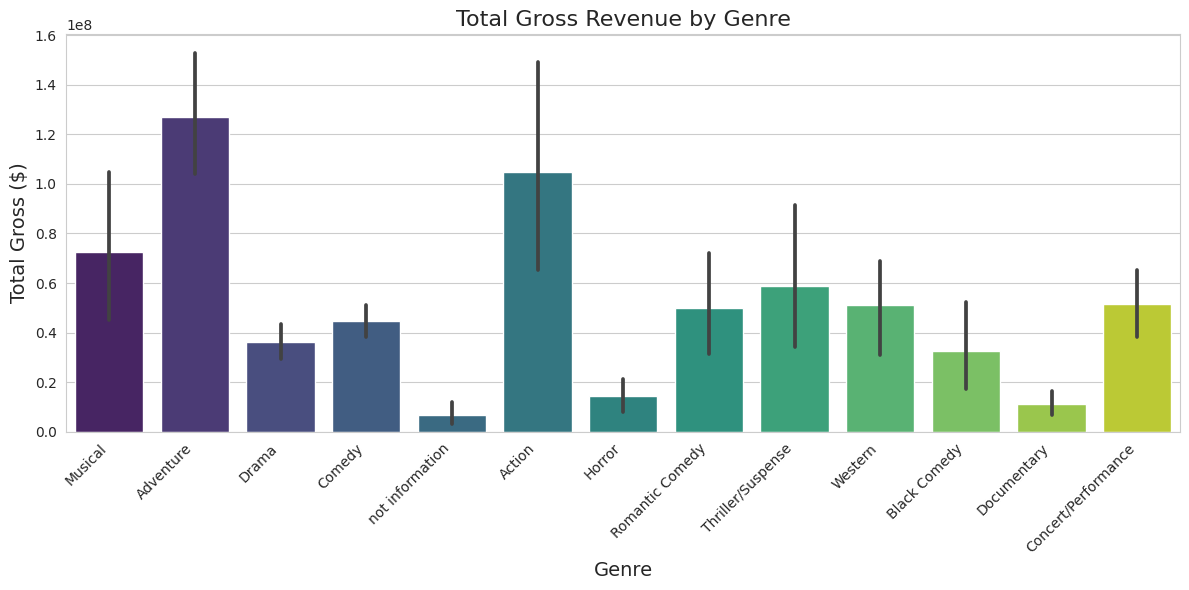

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(data=data, x='genre', y='total_gross', palette="viridis")

plt.xticks(rotation=45, ha='right')

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)
plt.title('Total Gross Revenue by Genre', fontsize=16)

plt.tight_layout()
plt.show()


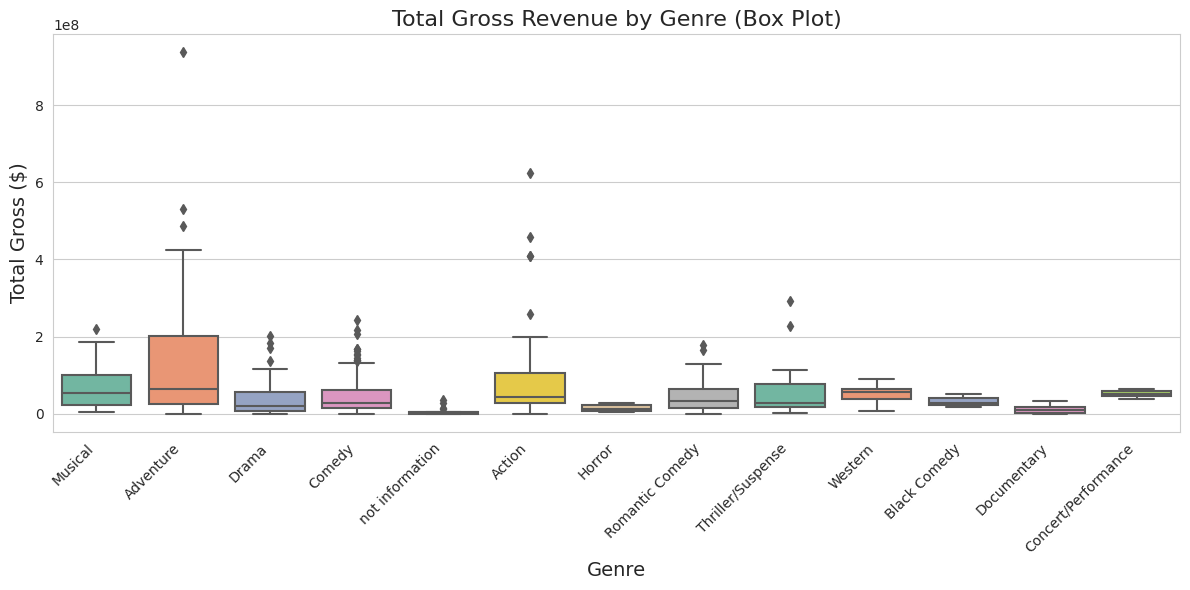

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.boxplot(data=data, x='genre', y='total_gross', palette="Set2")
plt.xticks(rotation=45, ha='right')

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)
plt.title('Total Gross Revenue by Genre (Box Plot)', fontsize=16)

plt.tight_layout()
plt.show()


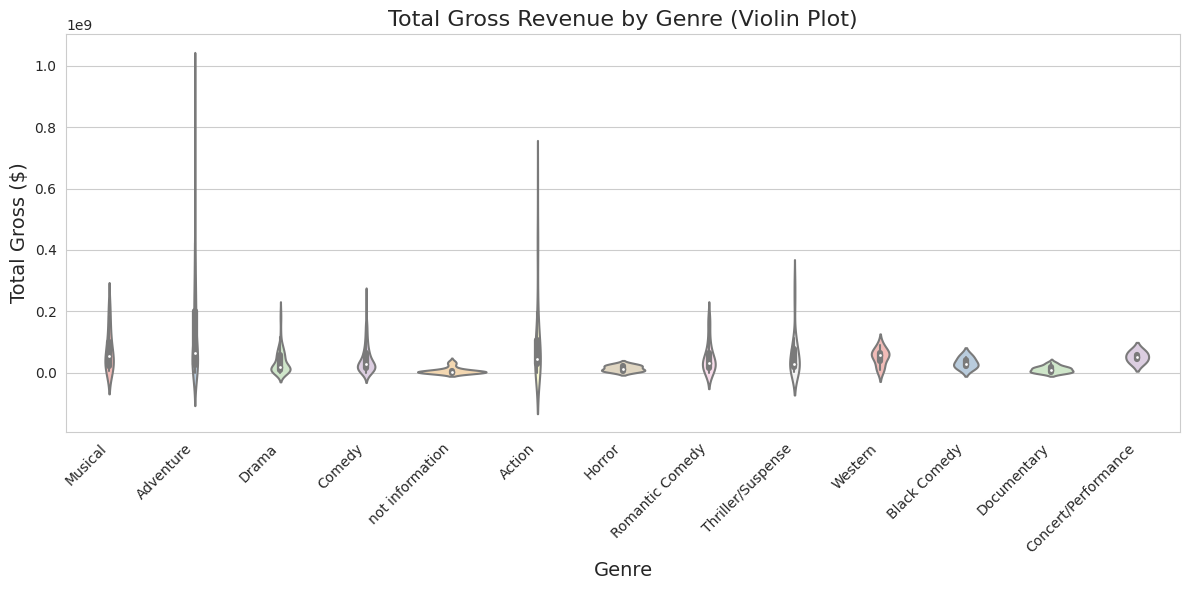

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.violinplot(data=data, x='genre', y='total_gross', palette="Pastel1")
plt.xticks(rotation=45, ha='right')

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)
plt.title('Total Gross Revenue by Genre (Violin Plot)', fontsize=16)

plt.tight_layout()
plt.show()


<ipython-input-50-98c436a50c77>:7: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

10.0% of the points cannot be placed; you may want t

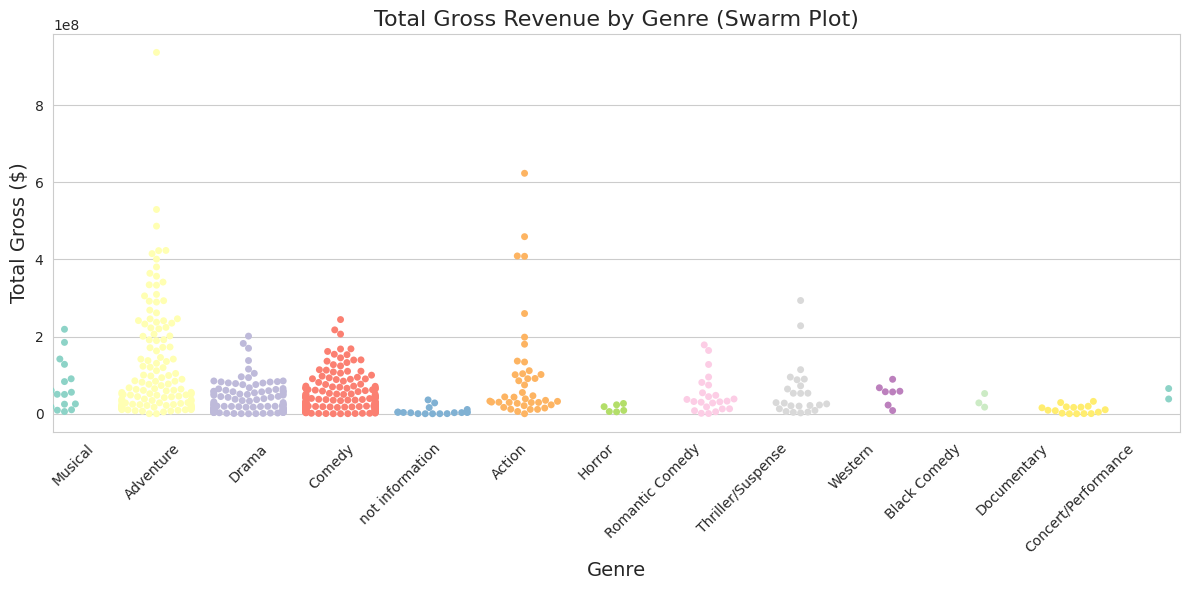

In [50]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

sns.swarmplot(data=data, x='genre', y='total_gross', palette="Set3", dodge=True)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)
plt.title('Total Gross Revenue by Genre (Swarm Plot)', fontsize=16)

plt.tight_layout()
plt.show()


<ipython-input-51-aa1c18d139be>:7: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



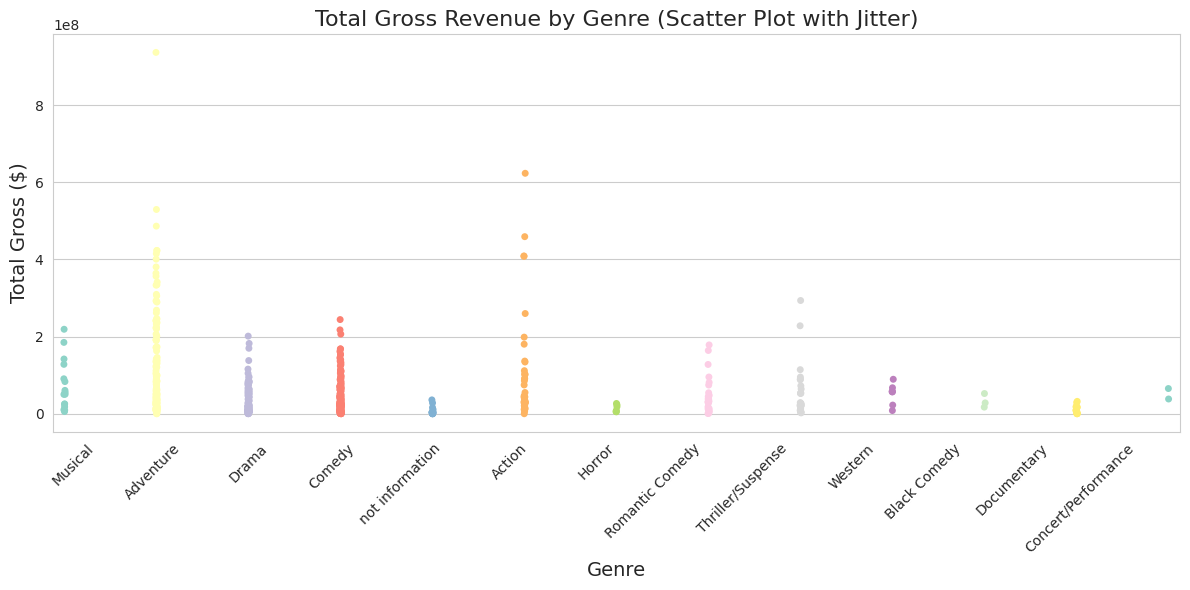

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.stripplot(data=data, x='genre', y='total_gross', palette="Set3", jitter=True, dodge=True)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)
plt.title('Total Gross Revenue by Genre (Scatter Plot with Jitter)', fontsize=16)

plt.tight_layout()
plt.show()


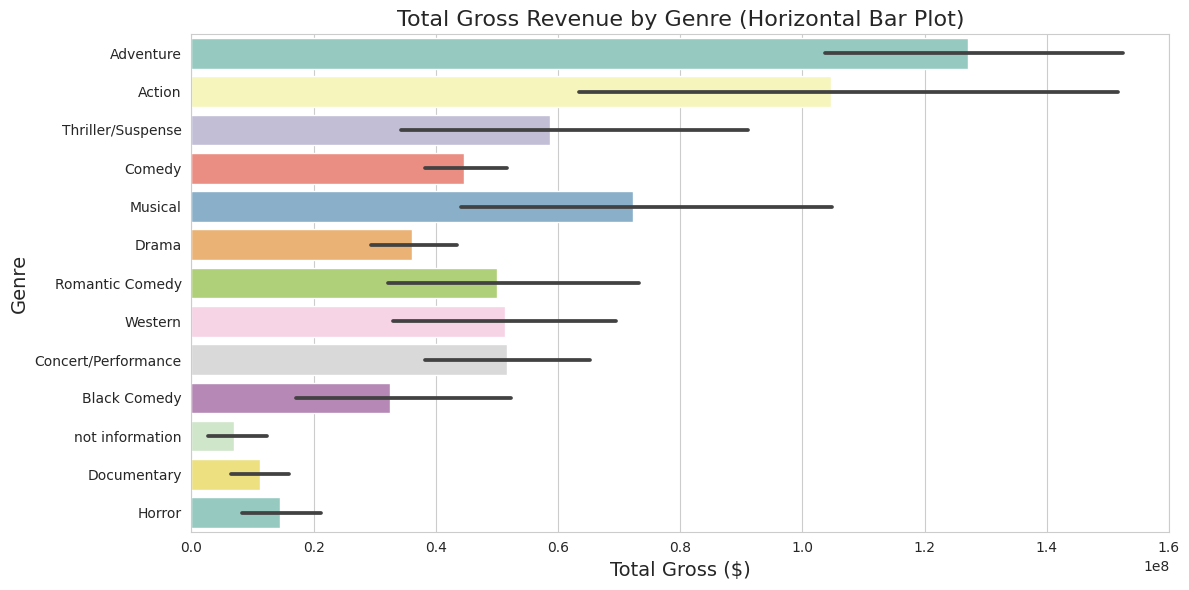

In [52]:
 data_sorted = data.sort_values(by='total_gross', ascending=False)
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=data_sorted, y='genre', x='total_gross', palette="Set3")

plt.xlabel('Total Gross ($)', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Total Gross Revenue by Genre (Horizontal Bar Plot)', fontsize=16)

plt.tight_layout()
plt.show()


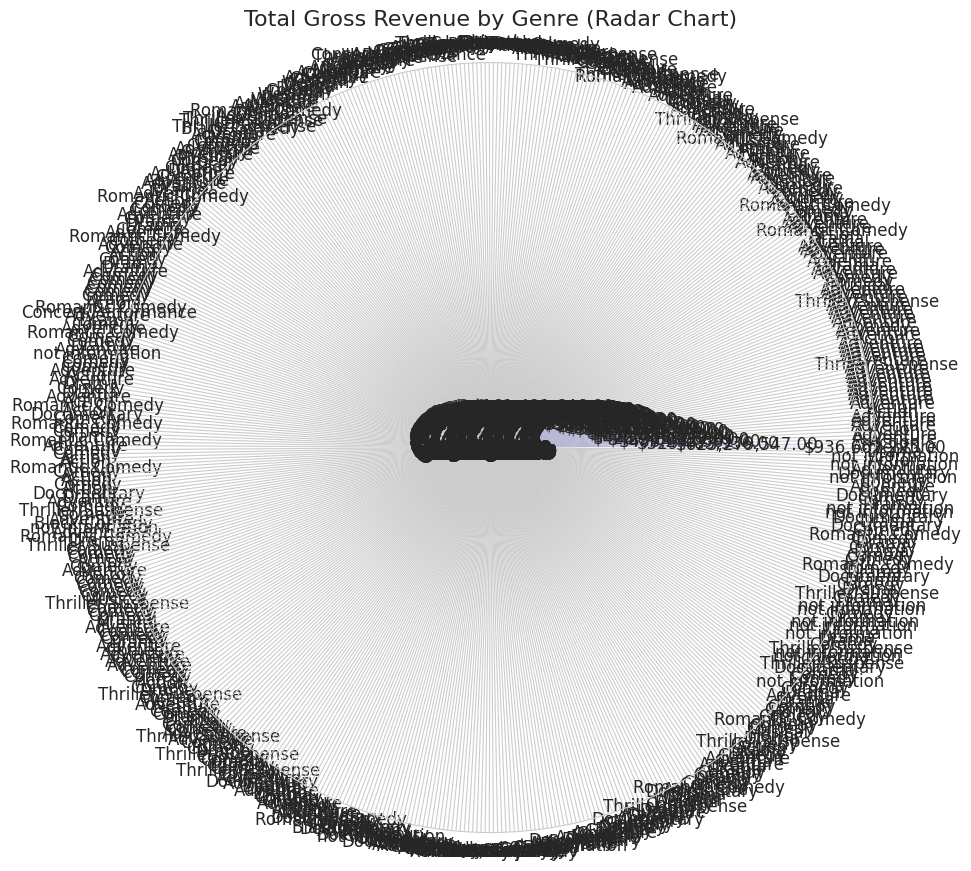

In [54]:
from math import pi
data_sorted = data.sort_values(by='total_gross', ascending=False)

genres = data_sorted['genre'].tolist()
total_gross = data_sorted['total_gross'].tolist()

num_genres = len(genres)
categories = genres

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

angles = [n / float(num_genres) * 2 * pi for n in range(num_genres)]
angles += angles[:1]

plt.xticks(angles[:-1], categories, fontsize=12)
plt.yticks([], [])
plt.ylim(0, max(total_gross) + 100)
plt.fill(angles, total_gross + total_gross[:1], 'b', alpha=0.1)

for angle, gross, category in zip(angles, total_gross, categories):
    plt.annotate(f"${gross:,.2f}", (angle, gross + 50), fontsize=12, ha='center', va='center')

plt.title('Total Gross Revenue by Genre (Radar Chart)', size=16)
plt.show()

<ipython-input-57-c1ae8a10f806>:18: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



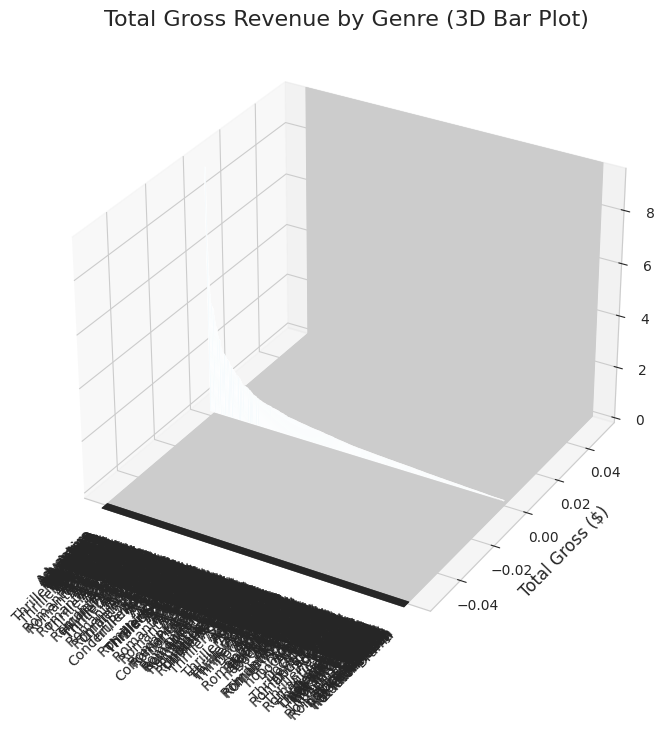

In [57]:
from mpl_toolkits.mplot3d import Axes3D
data_sorted = data.sort_values(by='total_gross', ascending=False)

genres = data_sorted['genre'].tolist()
total_gross = data_sorted['total_gross'].tolist()
x_indices = range(len(genres))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar(x_indices, total_gross, zs=0, zdir='y', width=0.8, color='skyblue', alpha=0.8)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Total Gross ($)', fontsize=12)
ax.set_zlabel('Count', fontsize=12)
ax.set_title('Total Gross Revenue by Genre (3D Bar Plot)', fontsize=16)
ax.set_xticks(x_indices)
ax.set_xticklabels(genres, rotation=45, ha='right')

plt.tight_layout()
plt.show()

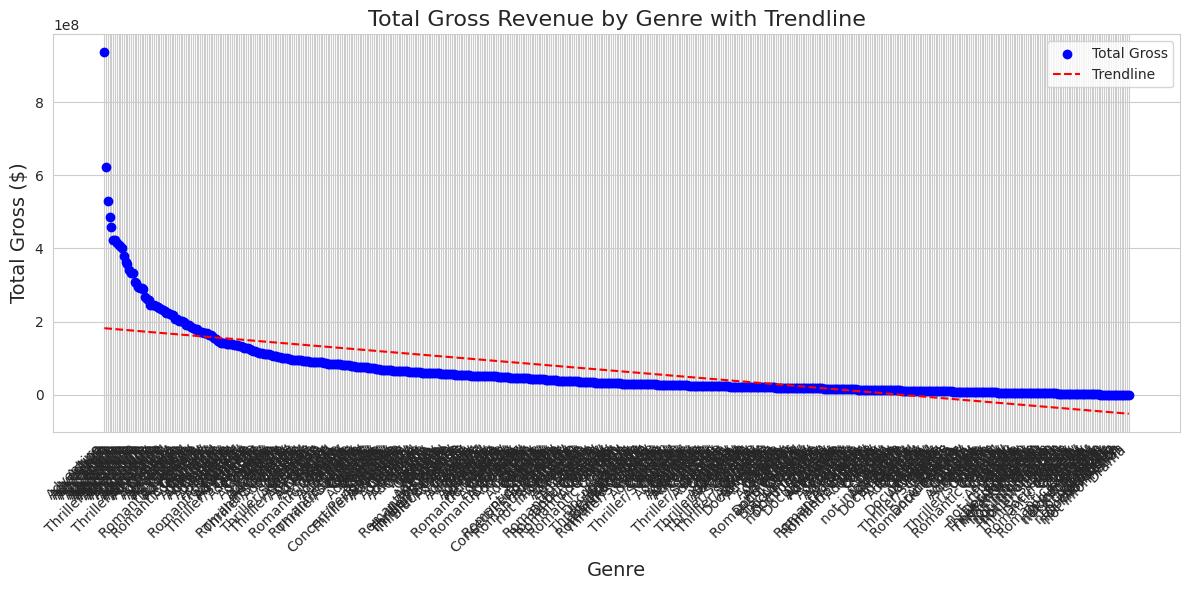

In [58]:
import numpy as np
data_sorted = data.sort_values(by='total_gross', ascending=False)
genres = data_sorted['genre'].tolist()
total_gross = data_sorted['total_gross'].tolist()

plt.figure(figsize=(12, 6))
plt.scatter(range(len(genres)), total_gross, color='blue', label='Total Gross')

coefficients = np.polyfit(range(len(genres)), total_gross, 1)
trendline = np.poly1d(coefficients)
plt.plot(range(len(genres)), trendline(range(len(genres))), color='red', linestyle='--', label='Trendline')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)
plt.title('Total Gross Revenue by Genre with Trendline', fontsize=16)
plt.xticks(range(len(genres)), genres, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


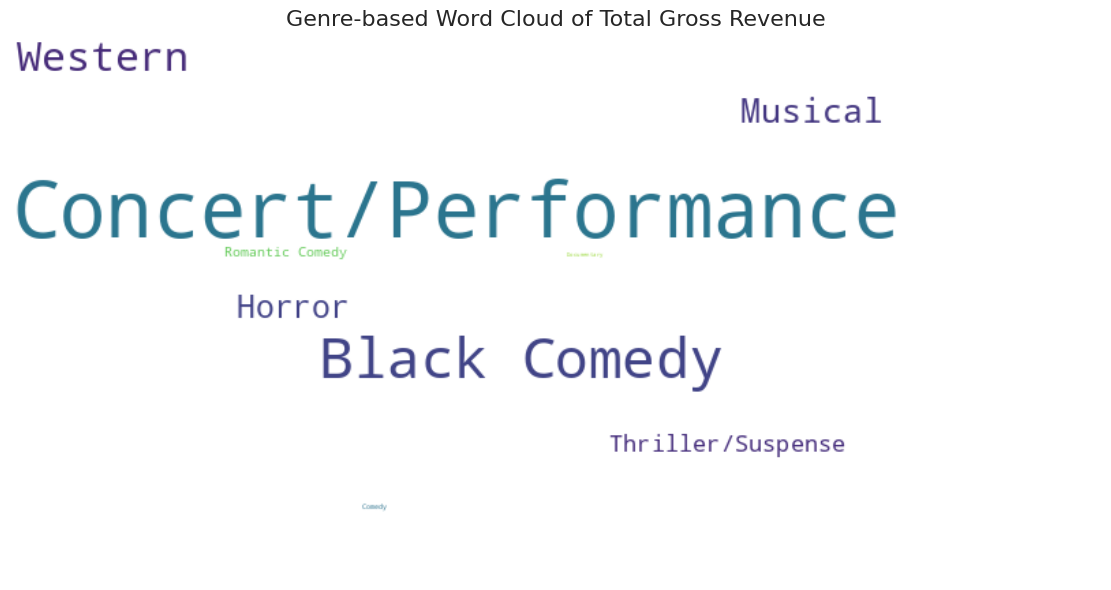

In [60]:
from wordcloud import WordCloud
data_sorted = data.sort_values(by='total_gross', ascending=False)

genres = data_sorted['genre'].tolist()
total_gross = data_sorted['total_gross'].tolist()

genre_dict = {genre: total for genre, total in zip(genres, total_gross)}

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(genre_dict)
plt.figure(figsize=(12, 6))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Genre-based Word Cloud of Total Gross Revenue', fontsize=16)
plt.tight_layout()
plt.show()

In [63]:
data_sorted = data.sort_values(by='total_gross', ascending=False)
fig = px.sunburst(data_sorted, path=['genre'], values='total_gross')
fig.update_layout(
    title='Total Gross Revenue by Genre (Sunburst Chart)',
    margin=dict(l=0, r=0, b=0, t=20)
)

fig.show()


<ipython-input-68-6356f15b514d>:21: UserWarning:

'color' and 'colormap' cannot be used simultaneously. Using 'color'

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:424: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



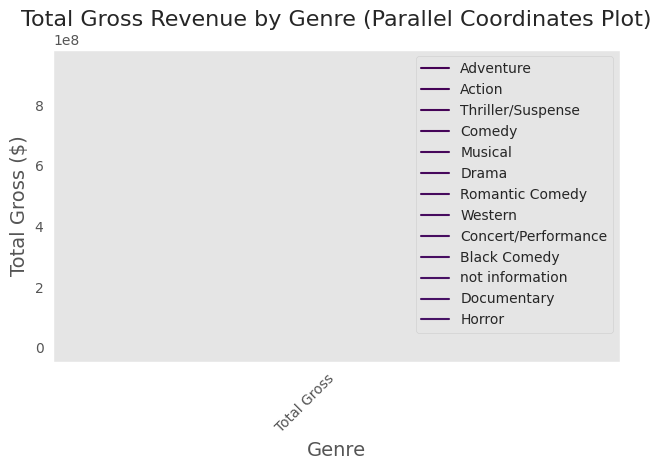

In [68]:
from pandas.plotting import parallel_coordinates
data_sorted = data.sort_values(by='total_gross', ascending=False)

genres = data_sorted['genre'].tolist()
total_gross = data_sorted['total_gross'].tolist()

df_parallel = pd.DataFrame({'Genre': genres, 'Total Gross': total_gross})
plt.style.use('ggplot')

parallel_coordinates(df_parallel, 'Genre', colormap='viridis', axvlines=False, color=[plt.get_cmap('viridis')(i) for i in range(len(df_parallel))])

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)
plt.title('Total Gross Revenue by Genre (Parallel Coordinates Plot)', fontsize=16)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

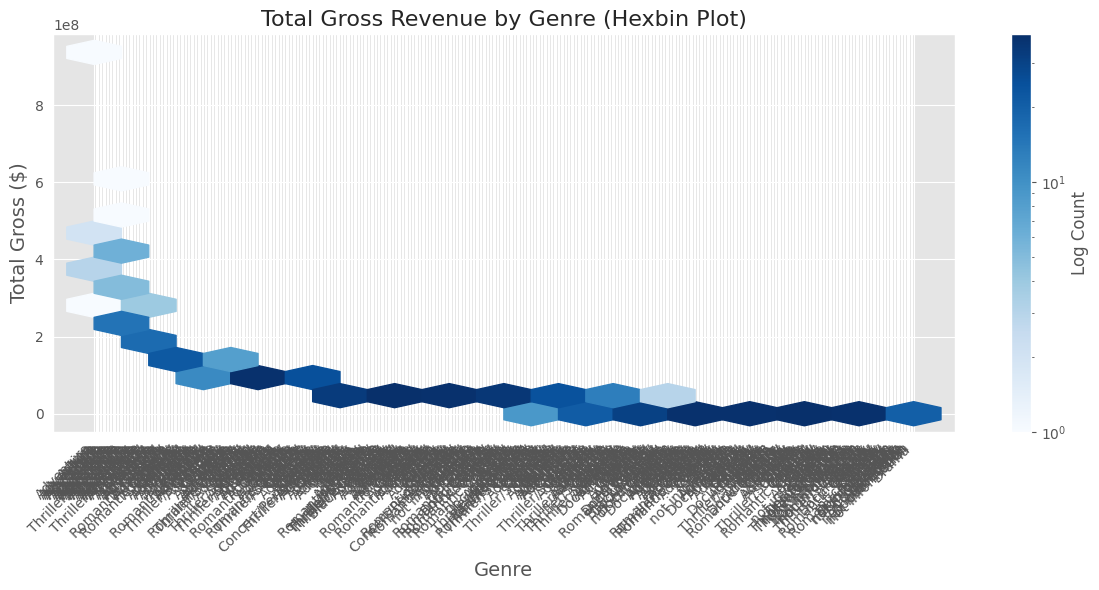

In [70]:
 data_sorted = data.sort_values(by='total_gross', ascending=False)

genres = data_sorted['genre'].tolist()
total_gross = data_sorted['total_gross'].tolist()

plt.figure(figsize=(12, 6))

hb = plt.hexbin(range(len(genres)), total_gross, gridsize=(15, 10), cmap='Blues', bins='log', mincnt=1)

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)
plt.title('Total Gross Revenue by Genre (Hexbin Plot)', fontsize=16)
plt.xticks(range(len(genres)), genres, rotation=45, ha='right')

cb = plt.colorbar(hb)
cb.set_label('Log Count', fontsize=12)

plt.tight_layout()
plt.show()

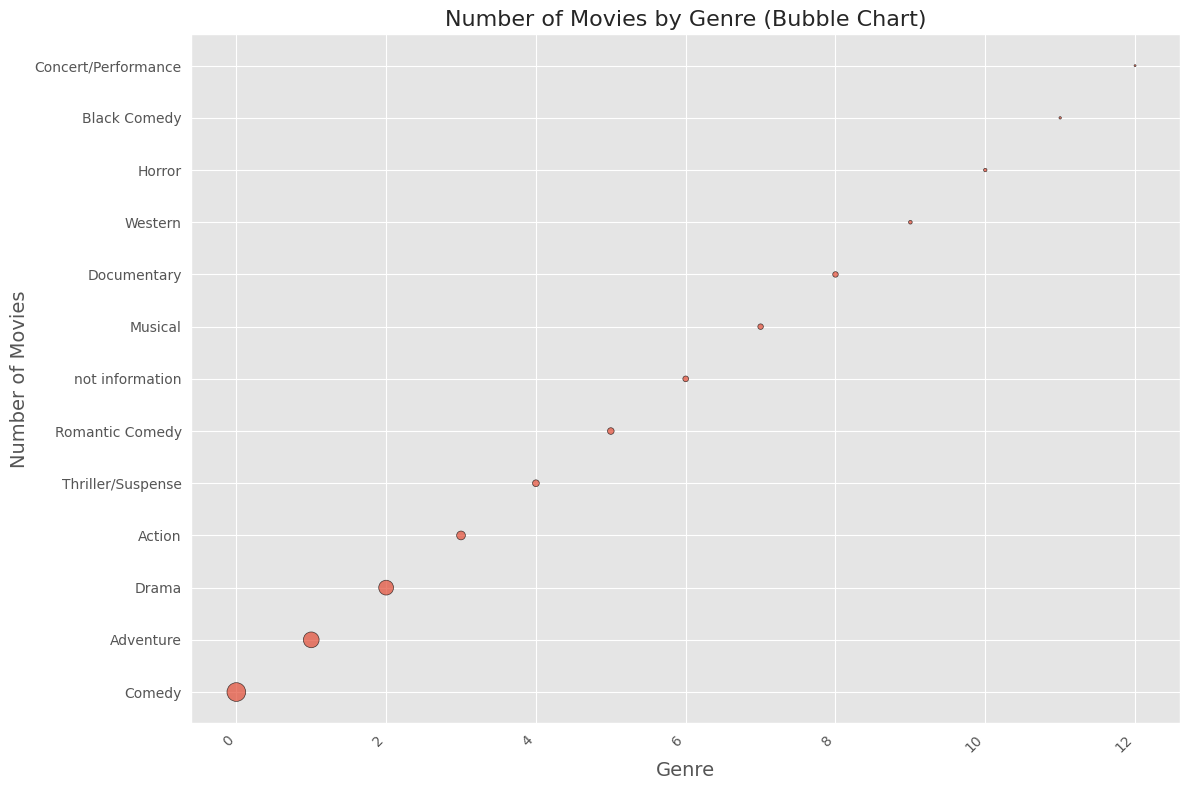

In [77]:
genre_counts = data['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

genre_counts_sorted = genre_counts.sort_values(by='count', ascending=False
plt.figure(figsize=(12, 8))

plt.scatter(
    range(len(genre_counts_sorted)),
    genre_counts_sorted['genre'],
    s=genre_counts_sorted['count'],
    alpha=0.7,
    edgecolors='k',
)

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Number of Movies by Genre (Bubble Chart)', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [84]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have a DataFrame named 'data' with columns 'genre' and 'total_gross'

# Group the data by genre and calculate the total gross revenue for each genre
genre_total_gross = data.groupby('genre')['total_gross'].sum().reset_index()

# Create a Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=genre_total_gross['genre'],
    ),
    link=dict(
        source=[0] * len(genre_total_gross),  # All sources start from the same point (node 0)
        target=[i + 1 for i in range(len(genre_total_gross))],  # Target nodes for each genre
        value=genre_total_gross['total_gross'],  # Values represent total gross revenue
    ),
))

# Set the title
fig.update_layout(title_text='Total Gross Revenue by Genre (Sankey Diagram)')

# Show the Sankey diagram
fig.show()


In [85]:
import plotly.express as px
genre_total_gross = data.groupby('genre')['total_gross'].sum().reset_index()

fig = px.treemap(
    genre_total_gross,
    path=['genre'],
    values='total_gross',
    title='Total Gross Revenue by Genre (Treemap)',
    color='total_gross',
    color_continuous_scale='viridis',
)
fig.update_layout(width=800, height=500)

fig.show()


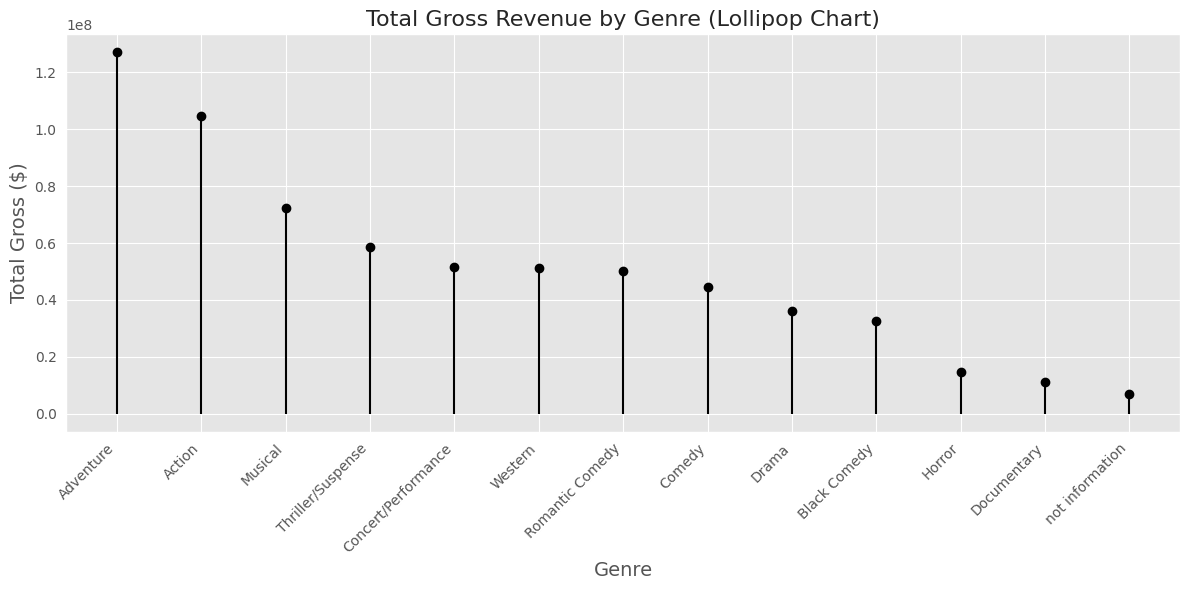

In [87]:
genre_total_gross = data.groupby('genre')['total_gross'].mean().reset_index()
genre_total_gross_sorted = genre_total_gross.sort_values(by='total_gross', ascending=False)

plt.figure(figsize=(12, 6))
plt.stem(
    genre_total_gross_sorted['genre'],
    genre_total_gross_sorted['total_gross'],
    markerfmt='o',  # Marker format
    basefmt=' ',  # Base format (no lines)
    linefmt='-k',  # Line format
)

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Gross ($)', fontsize=14)
plt.title('Total Gross Revenue by Genre (Lollipop Chart)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

<ipython-input-88-a7f0a0a141bd>:43: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



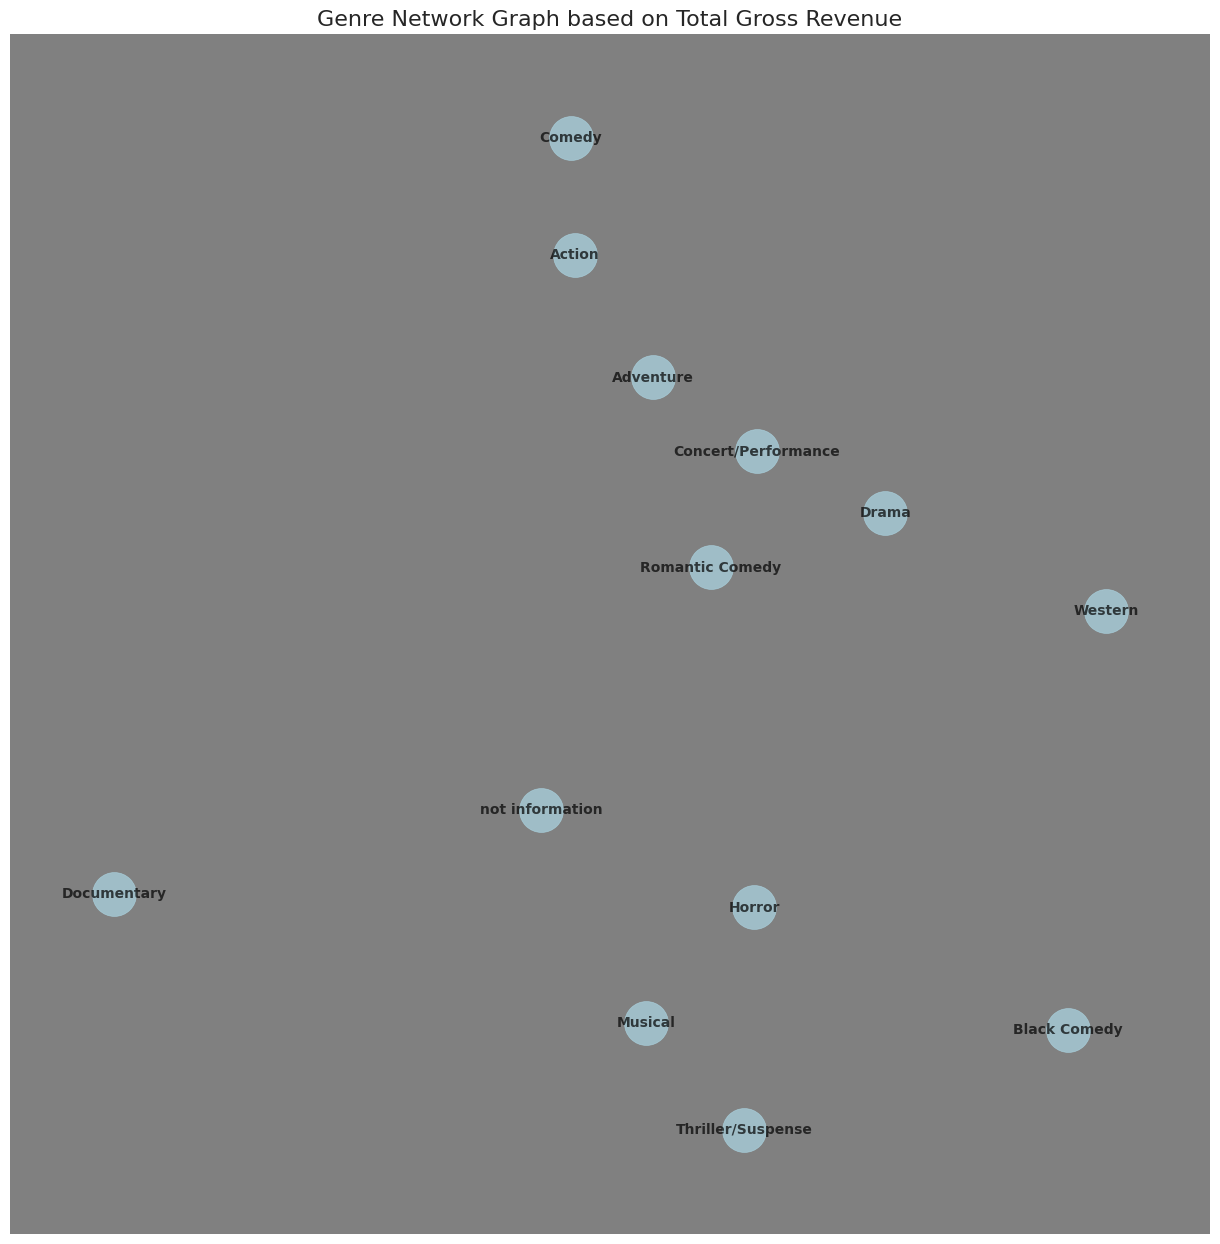

In [88]:
import networkx as nx
genre_total_gross = data.groupby('genre')['total_gross'].sum().reset_index()
genre_total_gross_sorted = genre_total_gross.sort_values(by='total_gross', ascending=False)

G = nx.Graph()

for idx, genre in enumerate(genre_total_gross_sorted['genre']):
    G.add_node(genre, label=genre, total_gross=genre_total_gross_sorted.iloc[idx]['total_gross'])
for i in range(len(genre_total_gross_sorted)):
    for j in range(i + 1, len(genre_total_gross_sorted)):
        genre1 = genre_total_gross_sorted.iloc[i]['genre']
        genre2 = genre_total_gross_sorted.iloc[j]['genre']
        total_gross1 = genre_total_gross_sorted.iloc[i]['total_gross']
        total_gross2 = genre_total_gross_sorted.iloc[j]['total_gross']
        weight = min(total_gross1, total_gross2)  # Use the minimum total gross as the edge weight
        G.add_edge(genre1, genre2, weight=weight)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
labels = nx.get_node_attributes(G, 'label')
weights = [edge[2]['weight'] for edge in G.edges(data=True)]
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, font_size=10, font_color='black',
        node_color='lightblue', font_weight='bold', width=weights, edge_color='gray', alpha=0.7)

plt.title('Genre Network Graph based on Total Gross Revenue', fontsize=16)

plt.axis('off')
plt.tight_layout()
plt.show()
